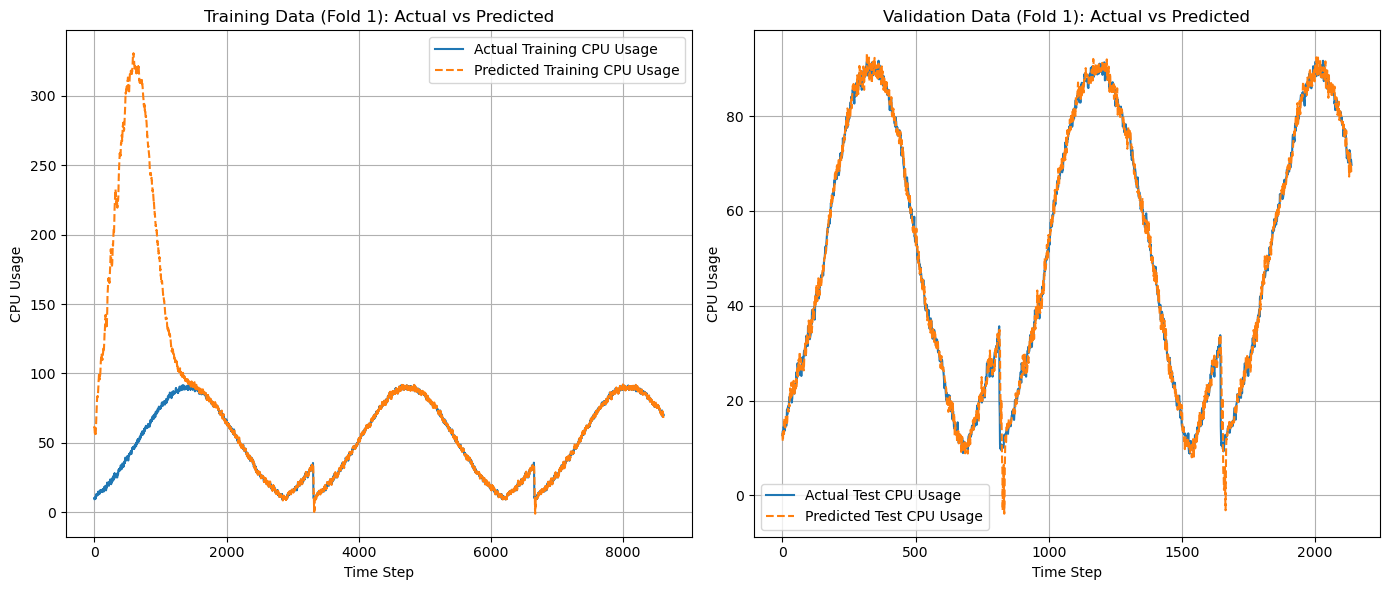

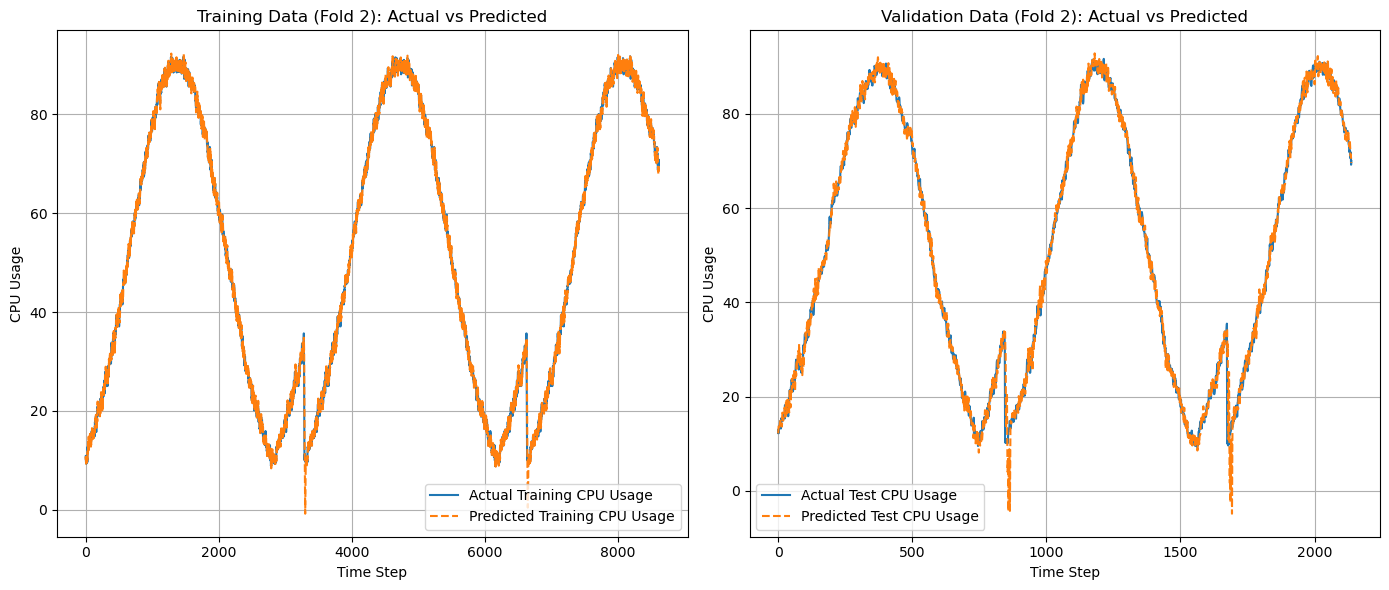

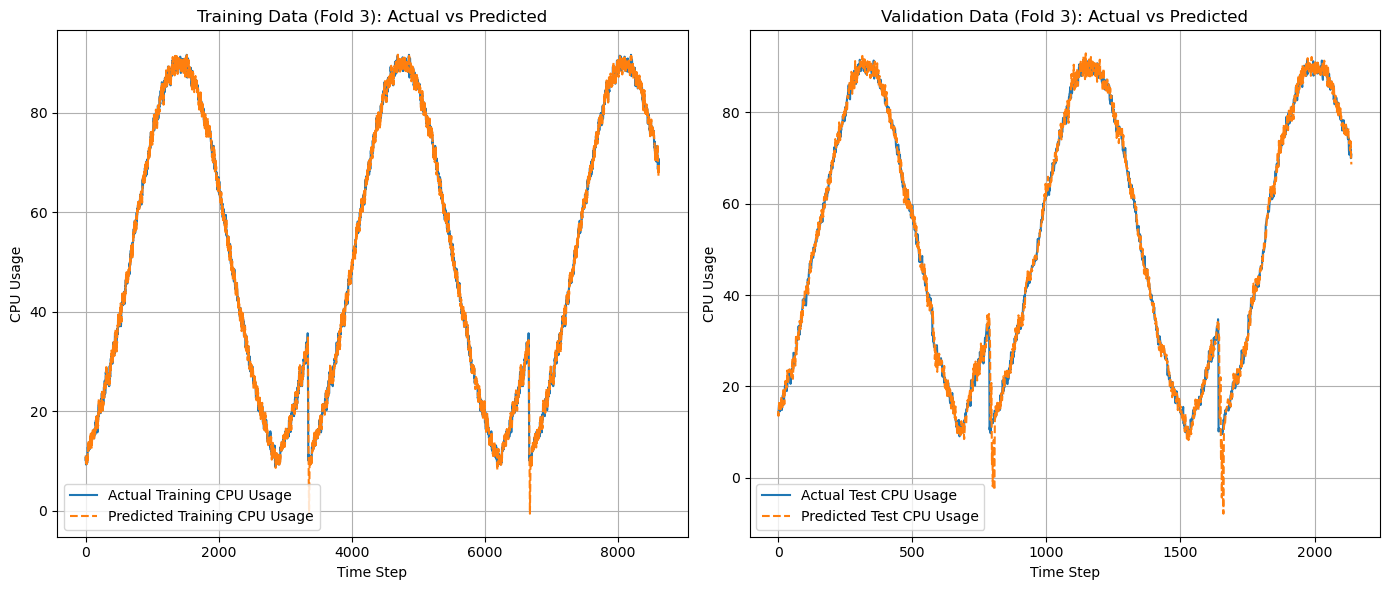

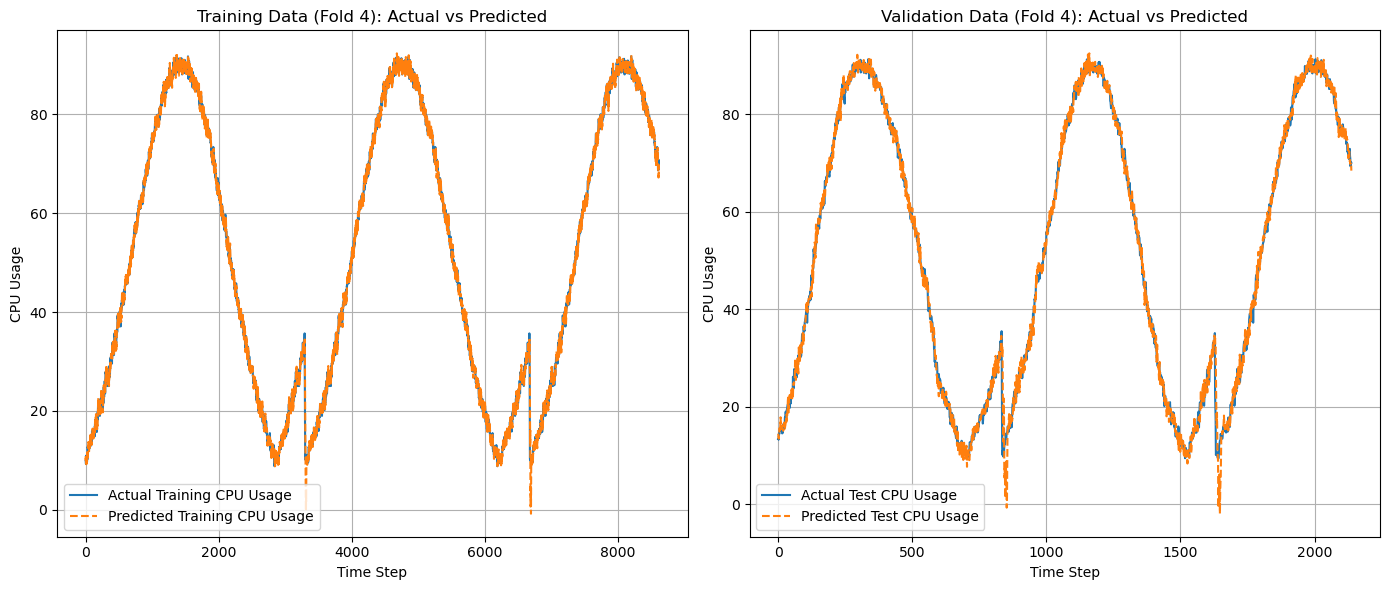

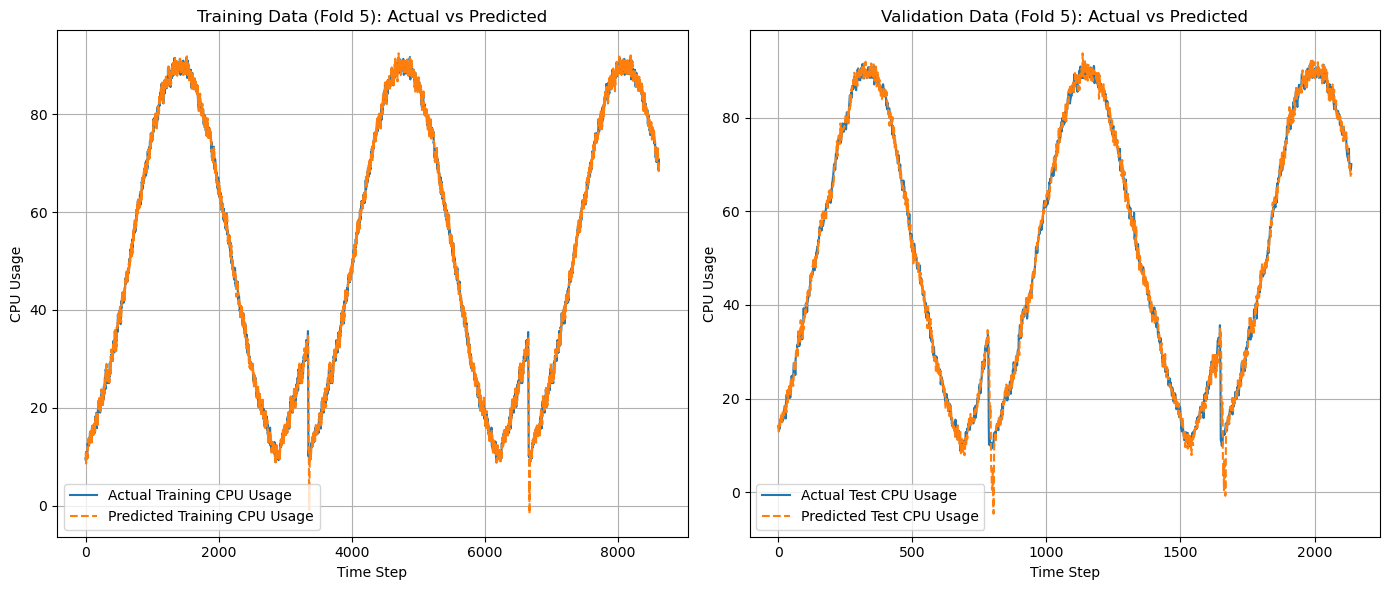

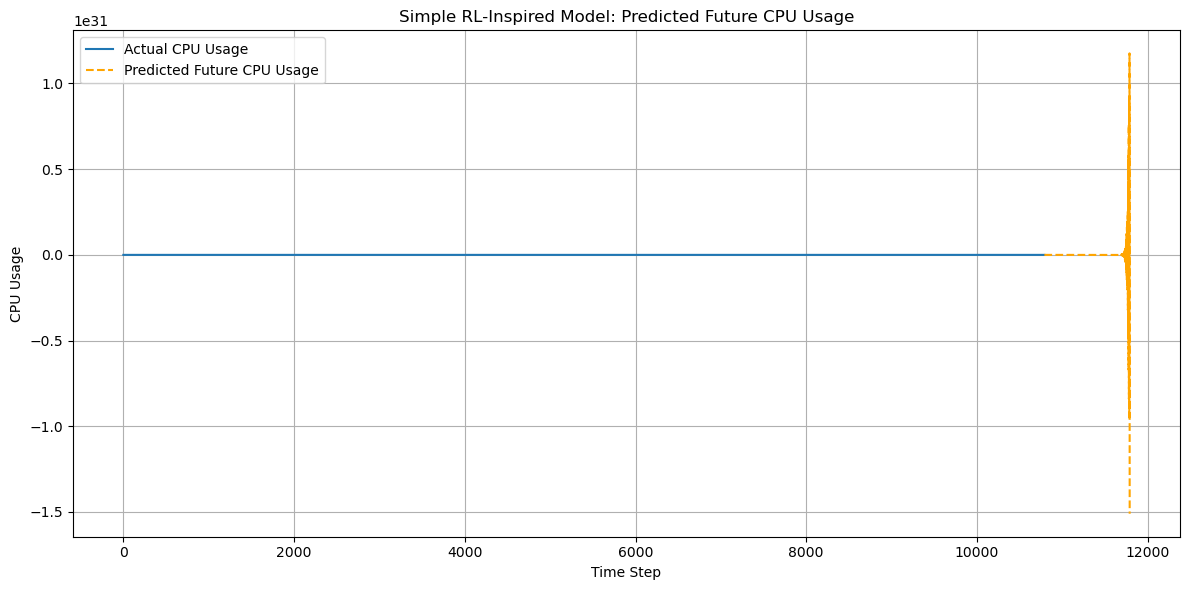

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Simple RL-Inspired Model
class SimpleRLModel:
    def __init__(self, window_size=10, learning_rate=0.01):
        self.window_size = window_size
        self.learning_rate = learning_rate
        self.weights = np.random.rand(window_size)

    def predict(self, window):
        return np.dot(self.weights, window)

    def update(self, window, true_value):
        prediction = self.predict(window)
        error = true_value - prediction
        self.weights += self.learning_rate * error * window
        return prediction

# Load CSV file
file_path = '/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/Newest addition/Gausian curve/gaussian_curve_fixedidk.csv'  # Update with your file path if necessary
df = pd.read_csv(file_path)

# Normalize the entire dataset
data_normalized = (df['Y'].values - np.min(df['Y'].values)) / (np.max(df['Y'].values) - np.min(df['Y'].values))

# Smooth the data using a moving window (e.g., 10 time steps)
window_size_smooth = 10
smoothed_data = np.convolve(data_normalized, np.ones(window_size_smooth) / window_size_smooth, mode='valid')

# Set up K-fold cross-validation (e.g., 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model with window size 20
model = SimpleRLModel(window_size=20, learning_rate=0.0005)  # Use 20 time steps

# Iterate over each fold
for fold, (train_index, val_index) in enumerate(kf.split(smoothed_data)):
    # Split data for this fold
    train_data = smoothed_data[train_index]
    val_data = smoothed_data[val_index]

    # Train the model on the training data
    predictions_train = []
    true_values_train = []
    
    for i in range(20, len(train_data)):  # Use 20 time steps for training
        window = train_data[i - 20:i]
        true_value = train_data[i]
        prediction = model.update(window, true_value)
        predictions_train.append(prediction)
        true_values_train.append(true_value)

    # Rescale the training predictions back to the original scale
    predictions_train_rescaled = np.array(predictions_train) * (np.max(df['Y'].values) - np.min(df['Y'].values)) + np.min(df['Y'].values)
    true_values_train_rescaled = np.array(true_values_train) * (np.max(df['Y'].values) - np.min(df['Y'].values)) + np.min(df['Y'].values)

    # Validate on the validation data
    predictions_val = []
    true_values_val = []

    for i in range(20, len(val_data)):  # Use 20 time steps for validation
        window = val_data[i - 20:i]
        true_value = val_data[i]
        prediction = model.predict(window)
        predictions_val.append(prediction)
        true_values_val.append(true_value)

    # Rescale the validation predictions back to the original scale
    predictions_val_rescaled = np.array(predictions_val) * (np.max(df['Y'].values) - np.min(df['Y'].values)) + np.min(df['Y'].values)
    true_values_val_rescaled = np.array(true_values_val) * (np.max(df['Y'].values) - np.min(df['Y'].values)) + np.min(df['Y'].values)

    # Plot the results for this fold
    plt.figure(figsize=(14, 6))

    # Left: Training data predictions
    plt.subplot(1, 2, 1)
    plt.plot(range(len(true_values_train_rescaled)), true_values_train_rescaled, label='Actual Training CPU Usage')
    plt.plot(range(len(predictions_train_rescaled)), predictions_train_rescaled, label='Predicted Training CPU Usage', linestyle='--')
    plt.title(f'Training Data (Fold {fold+1}): Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('CPU Usage')
    plt.legend()
    plt.grid(True)

    # Right: Validation data predictions
    plt.subplot(1, 2, 2)
    plt.plot(range(len(true_values_val_rescaled)), true_values_val_rescaled, label='Actual Test CPU Usage')
    plt.plot(range(len(predictions_val_rescaled)), predictions_val_rescaled, label='Predicted Test CPU Usage', linestyle='--')
    plt.title(f'Validation Data (Fold {fold+1}): Actual vs Predicted')
    plt.xlabel('Time Step')
    plt.ylabel('CPU Usage')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Now, make a prediction for the next 1000 steps after training on all data
last_window = smoothed_data[-20:].copy()  # Use the last 20 time steps

# Generate predictions for the next 1000 time steps
num_future_steps = 1000
future_predictions = []

for _ in range(num_future_steps):
    next_pred = model.predict(last_window)  # Now it will work with 20 time steps
    future_predictions.append(next_pred)
    last_window = np.append(last_window[1:], next_pred)  # Update the window by adding the new prediction

# Rescale the future predictions back to the original scale
future_predictions_rescaled = np.array(future_predictions) * (np.max(df['Y'].values) - np.min(df['Y'].values)) + np.min(df['Y'].values)

# Plotting the actual data and the future predictions
plt.figure(figsize=(12, 6))

# Plot the actual data
plt.plot(range(len(smoothed_data)), smoothed_data, label='Actual CPU Usage')

# Plot the future predictions
future_x = range(len(smoothed_data), len(smoothed_data) + num_future_steps)
plt.plot(future_x, future_predictions_rescaled, label='Predicted Future CPU Usage', color='orange', linestyle='--')

plt.xlabel('Time Step')
plt.ylabel('CPU Usage')
plt.title('Simple RL-Inspired Model: Predicted Future CPU Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


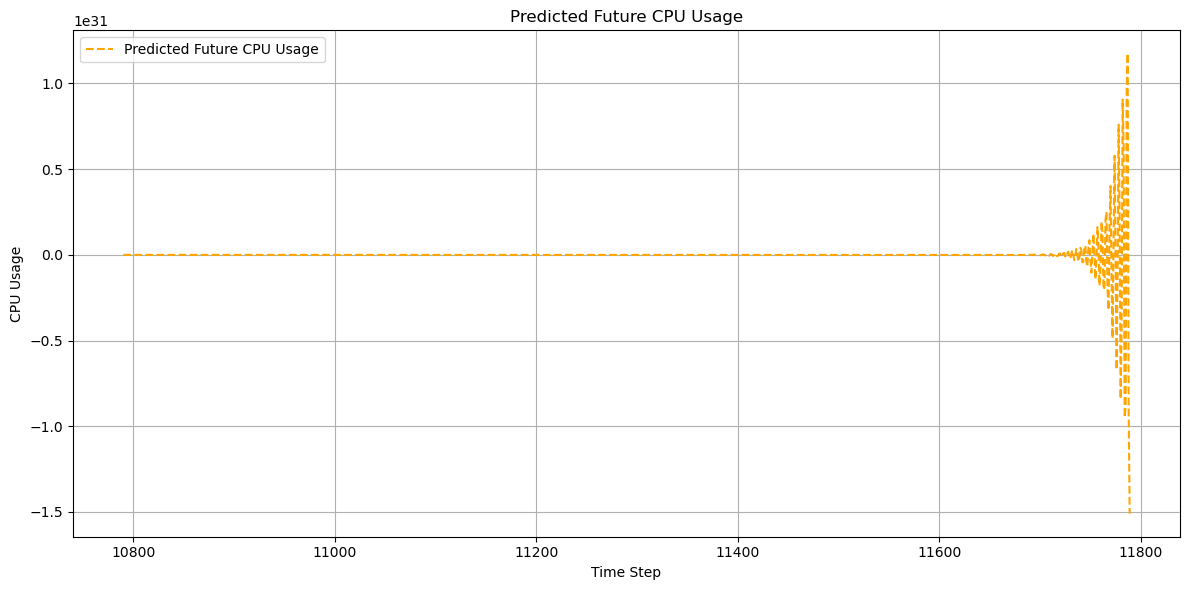

In [14]:
# Now, let's plot only the predicted future CPU usage in a separate graph for better visualization
plt.figure(figsize=(12, 6))

# Plot only the predicted future CPU usage
future_x = range(len(smoothed_data), len(smoothed_data) + num_future_steps)
plt.plot(future_x, future_predictions_rescaled, label='Predicted Future CPU Usage', color='orange', linestyle='--')

plt.xlabel('Time Step')
plt.ylabel('CPU Usage')
plt.title('Predicted Future CPU Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
